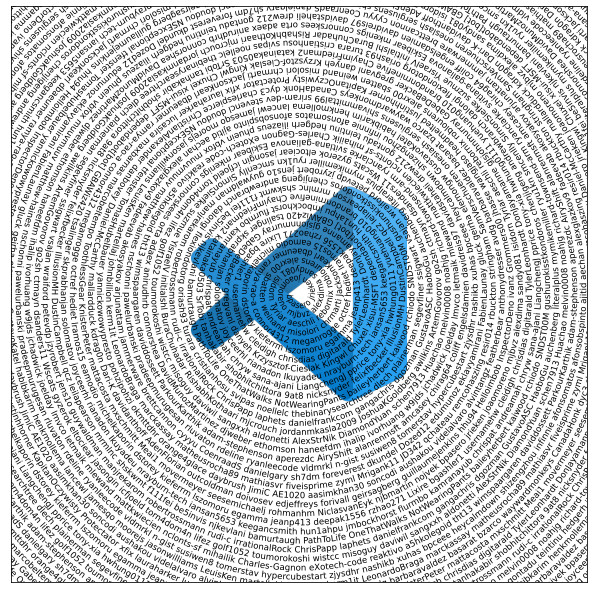

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.textpath import TextPath
from matplotlib.collections import PolyCollection
from matplotlib.font_manager import FontProperties
import matplotlib.image as mpimg
import mpmath
import pandas as pd 

vscode_contributors_1 = pd.read_json("https://api.github.com/repos/microsoft/vscode/contributors?per_page=100&page=1")
vscode_contributors_2 = pd.read_json("https://api.github.com/repos/microsoft/vscode/contributors?per_page=100&page=2")
vscode_contributors_3 = pd.read_json("https://api.github.com/repos/microsoft/vscode/contributors?per_page=100&page=3")
vscode_contributors_4 = pd.read_json("https://api.github.com/repos/microsoft/vscode/contributors?per_page=100&page=4")

n = 100
A = np.linspace(np.pi, n * 2 * np.pi, 10_000)
R = 5 + np.linspace(np.pi, n * 2 * np.pi, 10_000)
T = np.stack([R * np.cos(A), R * np.sin(A)], axis=1)
dx = np.cos(A) - R * np.sin(A)
dy = np.sin(A) + R * np.cos(A)
O = np.stack([-dy, dx], axis=1)
O = O / (np.linalg.norm(O, axis=1)).reshape(len(O), 1)

L = np.zeros(len(T))
np.cumsum(np.sqrt(((T[1:] - T[:-1]) ** 2).sum(axis=1)), out=L[1:])

mpmath.mp.dps = 15000
vs_code_contributors = ' '.join(vscode_contributors_1['login']) + ' '.join(vscode_contributors_2['login']) + ' '.join(vscode_contributors_3['login']) + ' '.join(vscode_contributors_4['login'])
text = str(vs_code_contributors + " " + vs_code_contributors + " " + vs_code_contributors + " " + vs_code_contributors)

path = TextPath((0, 0), text, size=6, prop=FontProperties(family="Source Serif Pro"))
Vx, Vy = path.vertices[:, 0], path.vertices[:, 1]
X = np.interp(Vx, L, T[:, 0]) + Vy * np.interp(Vx, L, O[:, 0])
Y = np.interp(Vx, L, T[:, 1]) + Vy * np.interp(Vx, L, O[:, 1])
Vx[...], Vy[...] = X, Y

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0, 0, 1, 1], aspect=1)
patch = PathPatch(path, facecolor="k", linewidth=0)
ax.add_artist(patch)

ax.set_xlim(-200, 200), ax.set_xticks([])
ax.set_ylim(-200, 200), ax.set_yticks([])
img = mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Visual_Studio_Code_1.35_icon.svg/512px-Visual_Studio_Code_1.35_icon.svg.png')
plt.imshow(img, extent=[-75,75, -75, 75])
plt.show()


In [ ]:
jax_contributors_1 = pd.read_json("https://api.github.com/repos/google/jax/contributors?per_page=100&page=1")
jax_contributors_2 = pd.read_json("https://api.github.com/repos/google/jax/contributors?per_page=100&page=2")
jax_contributors_3 = pd.read_json("https://api.github.com/repos/google/jax/contributors?per_page=100&page=3")
jax_contributors_4 = pd.read_json("https://api.github.com/repos/google/jax/contributors?per_page=100&page=4")

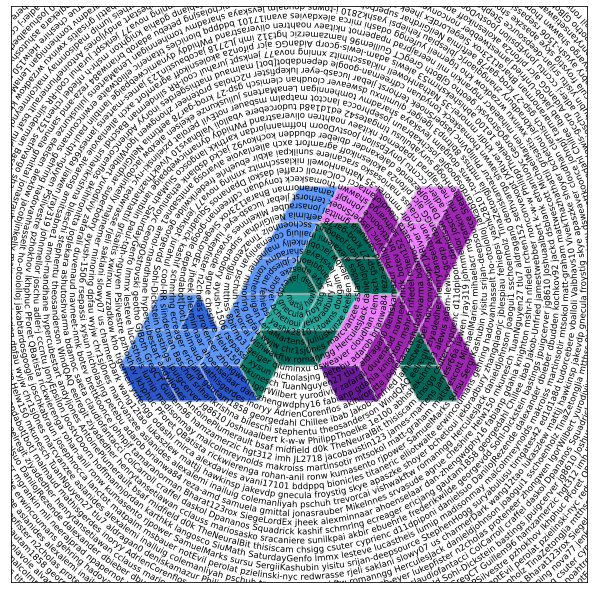

In [68]:
jax_contributors = ' '.join(jax_contributors_1['login']) + ' '.join(jax_contributors_2['login']) + ' '.join(jax_contributors_3['login']) + ' '.join(jax_contributors_4['login'])
text = str(jax_contributors + " " + jax_contributors + " " + jax_contributors + " " + jax_contributors)

path = TextPath((0, 0), text, size=6, prop=FontProperties(family="DejaVu Sans"))
Vx, Vy = path.vertices[:, 0], path.vertices[:, 1]
X = np.interp(Vx, L, T[:, 0]) + Vy * np.interp(Vx, L, O[:, 0])
Y = np.interp(Vx, L, T[:, 1]) + Vy * np.interp(Vx, L, O[:, 1])
Vx[...], Vy[...] = X, Y

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0, 0, 1, 1], aspect=1)
patch = PathPatch(path, facecolor="k", linewidth=0)
ax.add_artist(patch)

ax.set_xlim(-200, 200), ax.set_xticks([])
ax.set_ylim(-200, 200), ax.set_yticks([])
img = mpimg.imread('https://raw.githubusercontent.com/google/jax/main/images/jax_logo_250px.png')
plt.imshow(img, extent=[-125,125, -75, 75])
plt.show()
